In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

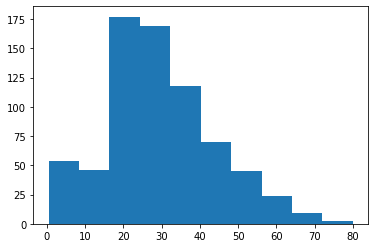

In [4]:
counts, bins = np.histogram(df["Age"].dropna())
plt.hist(bins[:-1], bins, weights=counts)

In [5]:
del df["Name"]
del df["Cabin"]
del df["Ticket"]
del df["Embarked"]
del df["Fare"]

In [6]:
df=pd.get_dummies(df,columns=["Sex"],drop_first=True)

In [7]:
del df["PassengerId"]
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [8]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,-0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,-0.245489
Sex_male,-0.543351,0.131900,0.093254,-0.114631,-0.245489,1.000000


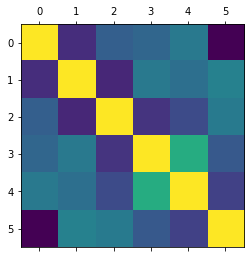

In [9]:
plt.matshow(df.corr())
plt.show()

In [10]:
from scipy.stats import pearsonr

In [11]:
df_clean = df[['Pclass', 'Age']].dropna()
pearsonr(df_clean['Pclass'], df_clean['Age'])

(-0.3692260153155172, 1.7566991549626533e-24)

In [12]:
df_clean = df[['Pclass', 'Survived']].dropna()
pearsonr(df_clean['Pclass'], df_clean['Survived'])

(-0.3384810359610153, 2.537047387978631e-25)

In [13]:
df_clean = df[['Parch', 'Age']].dropna()
pearsonr(df_clean['Parch'], df_clean['Age'])

(-0.18911926263203488, 3.5699493882872437e-07)

In [14]:
df_clean = df[['Parch', 'Survived']].dropna()
pearsonr(df_clean['Parch'], df_clean['Survived'])

(0.08162940708348379, 0.014799245374712763)

In [15]:
import math
def imputeNaN(df,feat_imp,feat_by):
    df[feat_imp+"_imputed"]=df[feat_imp]
    for i,inp in enumerate(df[feat_imp]):
        if math.isnan(inp):
            by_type=df[feat_by][i]
            df_temp=df.dropna().groupby(feat_by).sample(n=1)
            df[feat_imp+"_imputed"][i]=df_temp[feat_imp][df_temp[feat_by].index[list(df_temp[feat_by].values).index(by_type)]]
            

In [16]:
imputeNaN(df,"Age","Pclass")

In [17]:
df.isnull().sum()

Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Sex_male         0
Age_imputed      0
dtype: int64

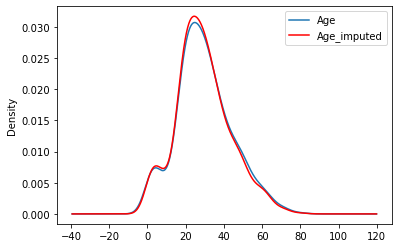

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_imputed.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [19]:
print(df['Age'].mean())
print(df['Age_imputed'].mean())

print(df['Age'].std())
print(df['Age_imputed'].std())

29.69911764705882
29.15226711560045
14.526497332334042
14.160346057649484


In [20]:
from scipy.stats import ttest_ind
ttest_ind(df['Age'].dropna(), df['Age_imputed'])

Ttest_indResult(statistic=0.7600528176438471, pvalue=0.4473347808609449)

In [21]:
def imputeNanRandom(df,variable):
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [22]:
imputeNanRandom(df,"Age")
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Age_imputed,Age_random
0,0,3,22.0,1,0,1,22.0,22.0
1,1,1,38.0,1,0,0,38.0,38.0
2,1,3,26.0,0,0,0,26.0,26.0
3,1,1,35.0,1,0,0,35.0,35.0
4,0,3,35.0,0,0,1,35.0,35.0
5,0,3,NaN,0,0,1,21.0,28.0
6,0,1,54.0,0,0,1,54.0,54.0
7,0,3,2.0,3,1,1,2.0,2.0
8,1,3,27.0,0,2,0,27.0,27.0
9,1,2,14.0,1,0,0,14.0,14.0


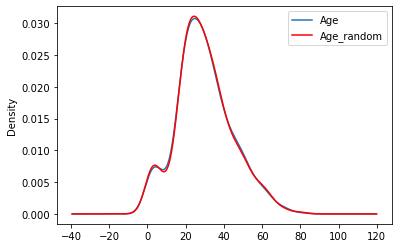

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
print(df['Age'].mean())
print(df['Age_imputed'].mean())
print(df["Age_random"].mean())
print()
print(df['Age'].std())
print(df['Age_imputed'].std())
print(df["Age_random"].std())

29.69911764705882
29.15226711560045
29.70034792368126

14.526497332334042
14.160346057649484
14.56365408956869


In [25]:
ttest_ind(df['Age'].dropna(), df['Age_random'])

Ttest_indResult(statistic=-0.001683742321121153, pvalue=0.9986567781347253)

In [26]:
df['Age_null']=np.where(df['Age'].isnull(),1,0)

In [27]:
df.tail()

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Age_imputed,Age_random,Age_null
886,0,2,27.0,0,0,1,27.0,27.0,0
887,1,1,19.0,0,0,0,19.0,19.0,0
888,0,3,NaN,1,2,0,20.0,15.0,1
889,1,1,26.0,0,0,1,26.0,26.0,0
890,0,3,32.0,0,0,1,32.0,32.0,0


In [28]:
X=df[['Pclass','SibSp','Parch','Sex_male','Age_random','Age_null']]
y=df['Survived']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Accuracy:   0.764925


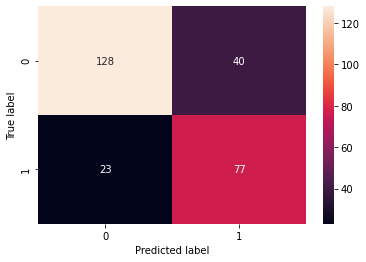

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns

model_nb=GaussianNB()

model_nb.fit(X_train, y_train)
pred_nb = model_nb.predict(X_test)
score = metrics.accuracy_score(y_test, pred_nb)
print("Accuracy:   %f" % score)
cm = metrics.confusion_matrix(y_test, pred_nb)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Accuracy:   0.824627


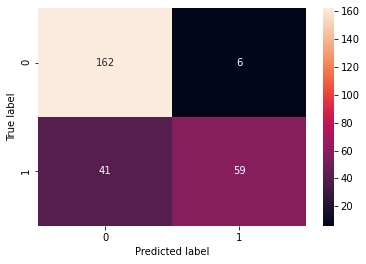

In [31]:
from sklearn import tree

model_dt=tree.DecisionTreeClassifier(criterion="entropy",max_depth=6,random_state=1)

model_dt.fit(X_train,y_train)
pred_dt=model_dt.predict(X_test)
score = metrics.accuracy_score(y_test, pred_dt)
print("Accuracy:   %f" % score)
cm = metrics.confusion_matrix(y_test, pred_dt)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Accuracy:   0.835821


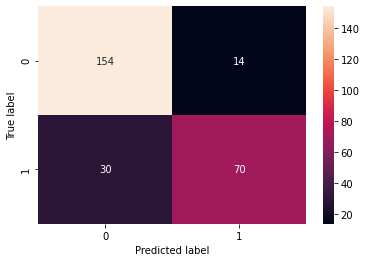

In [32]:
from sklearn import ensemble

model_rf=ensemble.RandomForestClassifier(n_estimators=20,criterion="entropy",max_depth=6,random_state=0)

model_rf.fit(X_train,y_train)
pred_rf=model_rf.predict(X_test)
score = metrics.accuracy_score(y_test, pred_rf)
print("Accuracy:   %f" % score)
cm = metrics.confusion_matrix(y_test, pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
X_train_nn=[]
y_train_nn=[]
X_test_nn=[]

for val in X_train.values:
    X_train_nn.append(val)
X_train_nn=np.array(X_train_nn)
for val in y_train.values:
    y_train_nn.append([val,1-val])
y_train_nn=np.array(y_train_nn)
for val in X_test.values:
    X_test_nn.append(val)
X_test_nn=np.array(X_test_nn)

In [34]:
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(0)
model_nn = Sequential()
model_nn.add(Dense(15, input_dim=len(X_train_nn[0])))
model_nn.add(Dense(10))
model_nn.add(Dense(10))
model_nn.add(Dense(len(y_train_nn[0]), activation="softmax"))
model_nn.compile(optimizer="adam", loss="mse", metrics=['accuracy'])

Using TensorFlow backend.


In [35]:
pred_nn=model_nn.fit(X_train_nn, y_train_nn, epochs=200, batch_size=30, verbose=0)

Accuracy:   0.798507


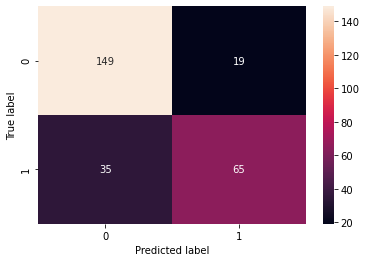

In [36]:
pred_nn_temp=model_nn.predict(X_test_nn)
pred_nn=[]
for i in pred_nn_temp:
    pred_nn.append(1-np.argmax(i))
score = metrics.accuracy_score(y_test, pred_nn)
print("Accuracy:   %f" % score)
cm = metrics.confusion_matrix(y_test, pred_nn)
sns.heatmap(cm, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [37]:
for i,y in enumerate(y_test):
    print(pred_nb[i],pred_dt[i],pred_rf[i],pred_nn[i],y)

0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
1 1 1 1 1
1 0 0 1 1
0 0 0 0 1
1 1 1 1 1
1 1 1 1 1
1 0 0 0 1
1 1 1 0 1
0 0 0 0 0
1 1 1 1 1
0 0 0 0 0
1 1 1 1 1
1 1 1 1 1
1 0 1 1 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 1 1 0 1
0 0 0 0 0
1 1 1 1 1
0 0 0 0 0
0 0 0 0 0
1 0 1 1 0
1 1 1 1 1
0 0 0 0 0
1 0 1 1 1
1 1 1 1 1
0 0 0 1 0
0 0 0 0 0
1 1 1 1 1
0 0 0 0 0
0 0 0 0 1
0 0 0 0 0
1 0 0 0 1
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
1 0 0 0 1
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
1 1 1 1 1
0 0 0 0 0
0 0 0 0 0
1 1 1 1 1
0 0 0 0 0
1 0 0 0 0
0 0 0 0 1
1 0 0 0 1
1 1 1 1 1
0 0 0 0 0
0 1 0 0 1
0 0 0 0 0
1 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 1
0 0 0 0 0
1 0 0 1 0
1 1 1 1 1
0 0 0 0 0
1 0 0 1 1
0 0 0 0 0
1 1 1 1 1
0 0 0 0 0
1 0 1 1 1
1 1 1 1 1
1 1 1 1 1
1 0 0 0 1
1 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 1 1 1 1
0 0 0 0 0
1 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 1 0 0 1
1 1 1 1 0
0 0 0 0 0
0 0 0 0 0
1 1 1 1 1
1 1 1 1 1
1 0 1 0 1
1 1 1 1 1
1 1 0 0 0
0 0 0 1 0
0 0 0 0 0
0 1 1 0 1
1 1 1 1 1
0 0 0 0 0
0 0 0 0 0
1 1 1 1 1
0 0 0 0 0
1 0 0 0 0
1 0 0 0 1


In [38]:
X_train_final=[]
for i,_ in enumerate(pred_nb):
    X_train_final.append([pred_nb[i],pred_dt[i],pred_rf[i],pred_nn[i]])
X_train_final=np.array(X_train_final)
y_train_final=[]
for val in y_test.values:
    y_train_final.append([val,1-val])
y_train_final=np.array(y_train_final)

In [39]:
np.random.seed(1)
model = Sequential()
model.add(Dense(15, input_dim=len(X_train_final[0])))
model.add(Dense(10))
model.add(Dense(10))
model.add(Dense(len(y_train_final[0]), activation="softmax"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [40]:
pred_final=model.fit(X_train_final, y_train_final, epochs=200, batch_size=20,validation_split=0.25 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 201 samples, validate on 67 samples
Epoch 1/200
201/201 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.7687 - val_loss: 0.6397 - val_accuracy: 0.7612
Epoch 2/200
201/201 [==============================] - 0s 252us/step - loss: 0.6215 - accuracy: 0.7910 - val_loss: 0.6198 - val_accuracy: 0.8209
Epoch 3/200
201/201 [==============================] - 0s 218us/step - loss: 0.5970 - accuracy: 0.8358 - val_loss: 0.5941 - val_accuracy: 0.8209
Epoch 4/200
201/201 [==============================] - 0s 159us/step - loss: 0.5659 - accuracy: 0.8358 - val_loss: 0.5662 - val_accuracy: 0.8209
Epoch 5/200
201/201 [==============================] - 0s 174us/step - loss: 0.5363 - accuracy: 0.8358 - val_loss: 0.5376 - val_accuracy: 0.8209
Epoch 6/200
201/201 [==============================] - 0s 149us/step - loss: 0.5015 - accuracy: 0.8308 - val_loss: 0.5125 - val_accuracy: 

201/201 [==============================] - 0s 203us/step - loss: 0.3980 - accuracy: 0.8358 - val_loss: 0.4708 - val_accuracy: 0.7910
Epoch 55/200
201/201 [==============================] - 0s 332us/step - loss: 0.3974 - accuracy: 0.8358 - val_loss: 0.4716 - val_accuracy: 0.7910
Epoch 56/200
201/201 [==============================] - 0s 243us/step - loss: 0.3969 - accuracy: 0.8308 - val_loss: 0.4728 - val_accuracy: 0.7910
Epoch 57/200
201/201 [==============================] - 0s 228us/step - loss: 0.3997 - accuracy: 0.8358 - val_loss: 0.4749 - val_accuracy: 0.7910
Epoch 58/200
201/201 [==============================] - 0s 213us/step - loss: 0.3978 - accuracy: 0.8308 - val_loss: 0.4731 - val_accuracy: 0.8507
Epoch 59/200
201/201 [==============================] - 0s 223us/step - loss: 0.3968 - accuracy: 0.8259 - val_loss: 0.4740 - val_accuracy: 0.8507
Epoch 60/200
201/201 [==============================] - 0s 208us/step - loss: 0.3968 - accuracy: 0.8259 - val_loss: 0.4730 - val_accuracy

Epoch 110/200
201/201 [==============================] - 0s 144us/step - loss: 0.3958 - accuracy: 0.8259 - val_loss: 0.4755 - val_accuracy: 0.8507
Epoch 111/200
201/201 [==============================] - 0s 164us/step - loss: 0.3955 - accuracy: 0.8408 - val_loss: 0.4755 - val_accuracy: 0.7910
Epoch 112/200
201/201 [==============================] - 0s 154us/step - loss: 0.3957 - accuracy: 0.8358 - val_loss: 0.4762 - val_accuracy: 0.7910
Epoch 113/200
201/201 [==============================] - 0s 159us/step - loss: 0.3967 - accuracy: 0.8358 - val_loss: 0.4763 - val_accuracy: 0.7910
Epoch 114/200
201/201 [==============================] - 0s 164us/step - loss: 0.3959 - accuracy: 0.8358 - val_loss: 0.4793 - val_accuracy: 0.8507
Epoch 115/200
201/201 [==============================] - 0s 149us/step - loss: 0.3996 - accuracy: 0.8259 - val_loss: 0.4850 - val_accuracy: 0.8209
Epoch 116/200
201/201 [==============================] - 0s 149us/step - loss: 0.4016 - accuracy: 0.8209 - val_loss: 0

Epoch 166/200
201/201 [==============================] - 0s 159us/step - loss: 0.3962 - accuracy: 0.8259 - val_loss: 0.4682 - val_accuracy: 0.8507
Epoch 167/200
201/201 [==============================] - 0s 174us/step - loss: 0.3964 - accuracy: 0.8259 - val_loss: 0.4689 - val_accuracy: 0.8507
Epoch 168/200
201/201 [==============================] - 0s 268us/step - loss: 0.3973 - accuracy: 0.8259 - val_loss: 0.4694 - val_accuracy: 0.8507
Epoch 169/200
201/201 [==============================] - 0s 198us/step - loss: 0.3963 - accuracy: 0.8259 - val_loss: 0.4696 - val_accuracy: 0.8507
Epoch 170/200
201/201 [==============================] - 0s 198us/step - loss: 0.3966 - accuracy: 0.8259 - val_loss: 0.4696 - val_accuracy: 0.8507
Epoch 171/200
201/201 [==============================] - 0s 194us/step - loss: 0.3960 - accuracy: 0.8259 - val_loss: 0.4695 - val_accuracy: 0.8507
Epoch 172/200
201/201 [==============================] - 0s 228us/step - loss: 0.3964 - accuracy: 0.8259 - val_loss: 0

In [41]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
df_test=pd.get_dummies(df_test,columns=["Sex"],drop_first=True)
imputeNanRandom(df_test,"Age")
df_test['Age_null']=np.where(df_test['Age'].isnull(),1,0)
df_test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Age_random,Age_null
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,1,34.5,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,47.0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,1,62.0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,1,27.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,22.0,0


In [44]:
x=df_test[['Pclass','SibSp','Parch','Sex_male','Age_random','Age_null']]

In [45]:
pred_nb=model_nb.predict(x)
pred_dt=model_dt.predict(x)
pred_rf=model_rf.predict(x)
pred_nn_temp=model_nn.predict(x)
pred_nn=[]
for i in pred_nn_temp:
    pred_nn.append(1-np.argmax(i))

In [46]:
x_final=[]
for i,_ in enumerate(pred_nb):
    x_final.append([pred_nb[i],pred_dt[i],pred_rf[i],pred_nn[i]])
x_final=np.array(x_final)

In [47]:
pred_final_temp=model.predict(x_final)
pred=[]
for i in pred_final_temp:
    pred.append(1-np.argmax(i))

In [48]:
with open("submission.csv",'w') as f:
    f.write("PassengerId,Survived\n")
    for i,v in enumerate(df_test.values):
        f.write(str(v[0])+','+str(pred[i])+'\n')